# QTM531 Assignment4
# Ao Lyu (Lorna)
# 04/05/2024

#### In this assignment, I will use Iris Dataset. This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

#### And here you can see more information about this dataset.
#### https://archive.ics.uci.edu/dataset/53/iris

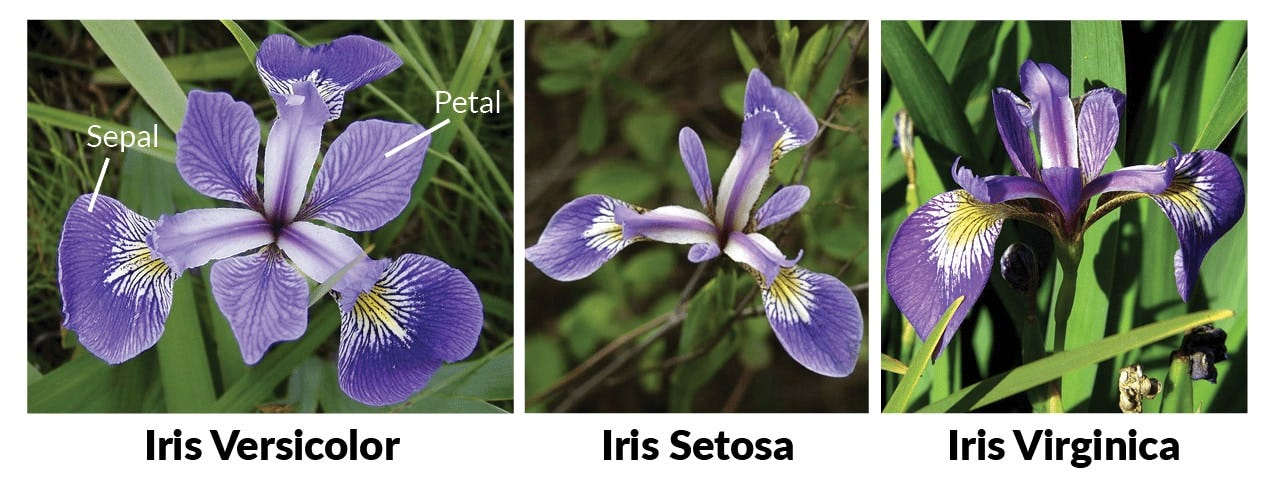

### **Insight**:

#### **Balanced Dataset**: The Iris dataset is evenly distributed among the three species, ideal for unbiased analysis.
#### **Distinct Characteristics**: Iris setosa is easily identified by small petals, while petal size is the key feature differentiating all species.
#### **Species Overlap**: Some overlap between Iris versicolor and Iris virginica is observed, particularly in sepal size.
#### **High Correlation**: Petal dimensions exhibit a strong correlation, unlike the weak relationship between sepal width and length.
#### **Model Performance**: KNN outperforms other models with 98% accuracy, suggesting it as the best fit for this dataset.
#### **Effective Clustering**: K-means clustering clearly separates species into three distinct groups, with centroids marking their centers.

In [222]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import cross_val_score
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_validate

### Dataset description

In [146]:
# Import the dataset
iris = pd.read_csv("/Users/aolyu/Downloads/Iris.csv")

# desplay the row and column of the dataset
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [147]:
iris.head() # display the first 5 rows of the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [148]:
# Drop the Id column
iris = iris.drop('Id', axis=1)

In [149]:
# Propotion of classes
iris['Species'].value_counts()

# Coverting the number into percentage(2 decimal places)
iris['Species'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'


Iris-setosa        33.33%
Iris-versicolor    33.33%
Iris-virginica     33.33%
Name: Species, dtype: object

/Users/aolyu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


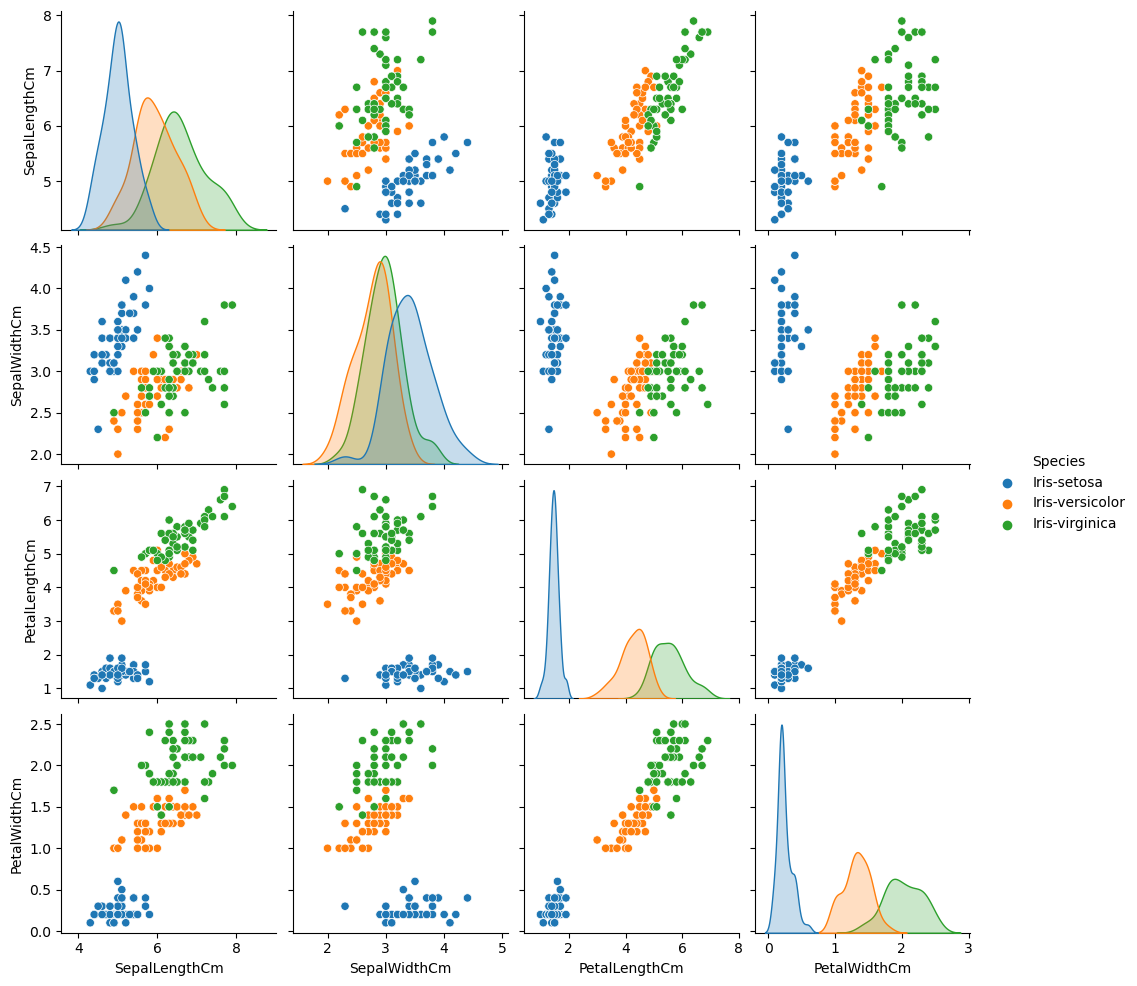

In [240]:
# Proportion of each species
iris['Species'].value_counts()

# Pairplot
sns.pairplot(iris, hue='Species')


### In the above graph, we can get some observations from it:
#### Iris setosa is easily distinguished by its smaller petals.
#### Petal length and width are key differentiators for all species.
#### Iris versicolor and Iris virginica show some overlap, especially in sepal dimensions.
#### The dataset shows a balanced representation of each species.

/var/folders/4d/z4q5k4qd0bgclyqnxbr4wkwr0000gn/T/ipykernel_87966/3163618421.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')


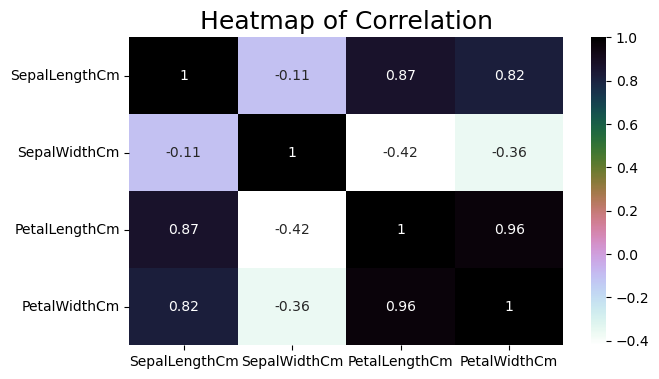

In [190]:
# Get the correlation of the columns
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') 
title = plt.title('Heatmap of Correlation', fontsize=18)
plt.show()

#### Sepal width and length are uncorrelated Petal width and length are highly correlated

#### We will use all the features to train the algorithm and check the accuracy.

### Splitting The Data into Training And Testing Dataset

In [242]:
# Split the data into independent 'X' and dependent 'Y' variables
X = iris.iloc[:, :-1].values
Y = iris.iloc[:, -1].values

# Split the dataset into 80% Training set and 20% Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0)

### Using Different Machine Learning Model to check accuracy

In [153]:
# SVM
model = svm.SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, Y_test))

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction, Y_test))

# Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction, Y_test))

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction, Y_test))
# 2 decimal places

The accuracy of the SVM is: 1.0
The accuracy of the Logistic Regression is 1.0
The accuracy of the Decision Tree is 1.0
The accuracy of the NaiveBayes is 0.9666666666666667


### Define a grid of tuning parameters and find the optimum for KNN

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666]


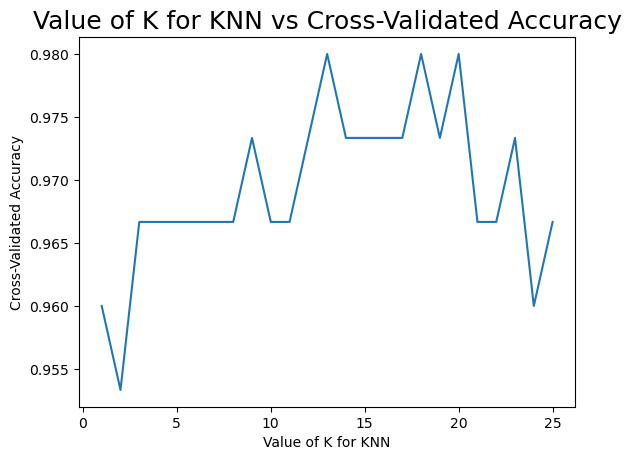

In [197]:
# define the tuning parameter for knn
k_range = range(1,26)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.title('Value of K for KNN vs Cross-Validated Accuracy', fontsize=18)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [168]:
# the best k value is 13
knn = KNeighborsClassifier(n_neighbors=13)
print(cross_val_score(knn, X, Y, cv=10, scoring='accuracy').mean())

0.9800000000000001


#### Therefore, the best value of K for KNN is 13.

In [169]:
# In a Nutshell
abc = []
classifiers = ['Svm', 'Logistic Regression', 'KNN','Decision Tree', 'Naive Bayes']
models = [svm.SVC(), LogisticRegression(), KNeighborsClassifier(n_neighbors=13), DecisionTreeClassifier(), GaussianNB()]

for i in models:
    model = i
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction, Y_test))
models_dataframe = pd.DataFrame(abc, index = classifiers)
models_dataframe.columns = ['Accuracy']
models_dataframe

# make it 1 decimal places
models_dataframe['Accuracy'] = models_dataframe['Accuracy'].mul(100).round(1).astype(str) + '%'
models_dataframe

,Accuracy
Svm,100.0%
Logistic Regression,100.0%
KNN,100.0%
Decision Tree,100.0%
Naive Bayes,96.7%


## Cross Validation

In [235]:
# split the data into 10 equal parts
kfold = KFold(n_splits=13, random_state=22,shuffle=True) 

In [237]:
# Using kfold cross validation
xyz = []
accuracy = []
std = []
classifiers = ['Svm', 'Logistic Regression', 'KNN','Decision Tree', 'Naive Bayes']
models = [svm.SVC(), LogisticRegression(), KNeighborsClassifier(n_neighbors=13), DecisionTreeClassifier(), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = 11, scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame(xyz,index=classifiers)
new_models_dataframe2.columns = ['CV Mean']
new_models_dataframe2

# make it 1 decimal places
new_models_dataframe2['CV Mean'] = new_models_dataframe2['CV Mean'].mul(100).round(1).astype(str) + '%'
new_models_dataframe2

,CV Mean
Svm,97.4%
Logistic Regression,96.7%
KNN,98.0%
Decision Tree,94.7%
Naive Bayes,95.4%


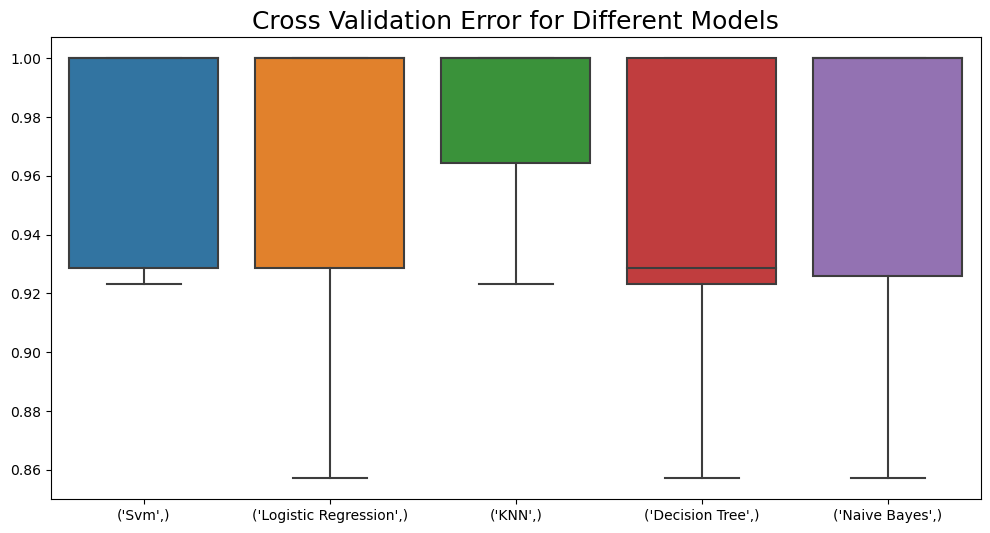

In [238]:
# compute the cross validation error
plt.subplots(figsize=(12,6))
plt.title('Cross Validation Error for Different Models', fontsize=18)
box=pd.DataFrame(accuracy,index=[classifiers])
sns.boxplot(box.T)
plt.show()

#### Therefore, the highest accuracy rate is KNN. We can concluse from the above boxplot that KNN perform the best while decision tree performs the worst.

In [239]:

# using for loop to get all the models above, and k for k = 13, obtained performance metrics for the models obove.
# for i in models:
#     model = i
#     cv_results = cross_validate(model, X, Y, cv = kfold, scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
#     print('Model:', i)
#     print('Accuracy:', cv_results['test_accuracy'].mean().round(2))
#     print('Precision:', cv_results['test_precision_macro'].mean().round(2))
#     print('Recall:', cv_results['test_recall_macro'].mean().round(2))
#     print('F1 Score:', cv_results['test_f1_macro'].mean().round(2))
#     print('\n')

# Then make the above result into a dataframe
accuracy = []
precision = []
recall = []
f1 = []
for i in models:
    model = i
    cv_results = cross_validate(model, X, Y, cv = 11, scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
    accuracy.append(cv_results['test_accuracy'].mean())
    precision.append(cv_results['test_precision_macro'].mean())
    recall.append(cv_results['test_recall_macro'].mean())
    f1.append(cv_results['test_f1_macro'].mean())
performance_metrics = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}, index = classifiers)
performance_metrics = performance_metrics.mul(100).round(1).astype(str) + '%'
performance_metrics

,Accuracy,Precision,Recall,F1 Score
Svm,97.4%,97.7%,97.6%,97.4%
Logistic Regression,96.7%,96.9%,96.8%,96.7%
KNN,98.0%,98.3%,98.2%,98.0%
Decision Tree,94.8%,95.2%,94.8%,94.7%
Naive Bayes,95.4%,95.7%,95.5%,95.4%


#### KNN leads with the highest scores across all metrics, peaking at 98% accuracy and F1 score.
#### SVM also shows strong performance with over 97% in all metrics.
#### The Decision Tree model has notably lower performance compared to others, especially in accuracy and F1 score.
#### Precision and recall are closely matched for each model, indicating balanced performance on identifying positive cases and avoiding false positives.
#### All models show good predictive power with over 94% accuracy, reflecting well on the dataset's features and the model's capabilities.

#### **Above all, I would suggest to choose KNN as our final model.**







## K means

#### K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [174]:
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
assignments = kmeans.labels_

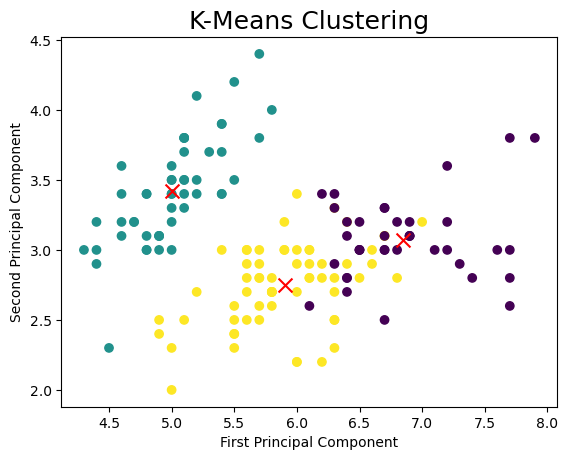

In [198]:
# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=assignments, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='x', s=100, c='red')
plt.title('K-Means Clustering', fontsize=18)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


#### Three clusters are visible, each marked with a red "X" representing the centroid.